In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
print(X[:3, :])
print('-'*15)
print(y[:3])


[[   19 19000]
 [   35 20000]
 [   26 43000]]
---------------
[0 0 0]


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =
0.25, random_state = 0)
print(X_train[:3])
print('-'*15)
print(y_train[:3])
print('-'*15)
print(X_test[:3])
print('-'*15)
print(y_test[:3])


[[    44  39000]
 [    32 120000]
 [    38  50000]]
---------------
[0 1 0]
---------------
[[   30 87000]
 [   38 50000]
 [   35 75000]]
---------------
[0 0 0]


In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
print(X_train[:3])
print('-'*15)
print(X_test[:3])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]]
---------------
[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]]


In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs' )
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(X_test[:10])
print('-'*15)
print(y_pred[:10])
print(y_pred[:20])
print(y_test[:20])


[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]
 [-1.10189888 -1.43757673]
 [-0.70576986 -1.58254245]
 [-0.21060859  2.15757314]
 [-1.99318916 -0.04590581]
 [ 0.8787462  -0.77073441]]
---------------
[0 0 0 0 0 0 0 1 0 1]
[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]


In [9]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.89      0.96      0.92        68\n           1       0.89      0.75      0.81        32\n\n    accuracy                           0.89       100\n   macro avg       0.89      0.85      0.87       100\nweighted avg       0.89      0.89      0.89       100\n'

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[65  3]
 [ 8 24]]


In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.89

C:\Users\ankit\AppData\Local\Temp\ipykernel_11612\1722555208.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


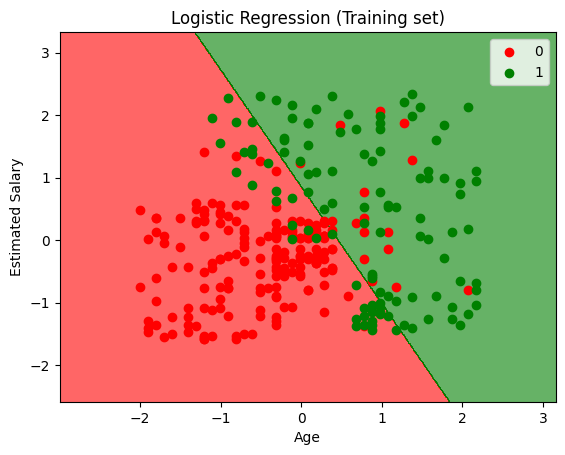

In [12]:
# Visualizing the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop =
X_set[:, 0].max() + 1, step = 0.01),
 np.arange(start = X_set[:, 1].min() - 1, stop =
X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
X2.ravel()]).T).reshape(X1.shape),
 alpha = 0.6, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
 plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
 c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\ankit\AppData\Local\Temp\ipykernel_11612\3570890119.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


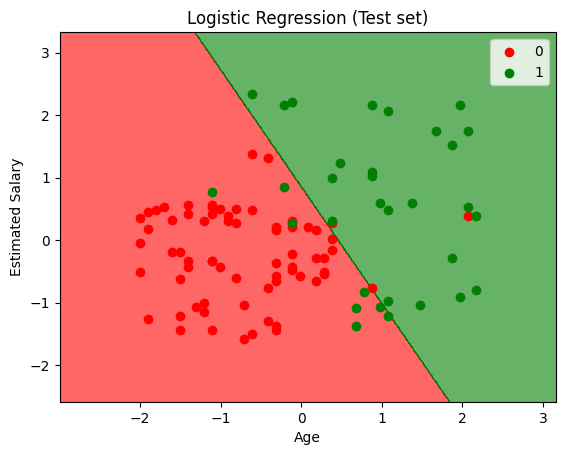

In [13]:
# Visualizing the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop =
X_set[:, 0].max() + 1, step = 0.01),
 np.arange(start = X_set[:, 1].min() - 1, stop =
X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
X2.ravel()]).T).reshape(X1.shape),
 alpha = 0.6, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
 plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
 c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
